# 01. データシミュレーションの基礎 (Data Simulation Basics)

## 概要
機械学習の学習と実験に必要な合成データを生成する方法を学びます。

## 学習目標
- scikit-learnで様々な合成データを生成できる
- データの特性（線形分離可能性、ノイズ）を理解できる
- データを可視化して特徴を把握できる
- 分類と回帰のデータ生成の違いを理解できる
- カスタムデータセットを作成できる

In [ ]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.datasets import (
    make_classification, make_regression, make_moons, 
    make_circles, make_blobs, make_gaussian_quantiles
)

# 日本語フォント設定
def setup_japanese_font():
    """日本語フォントを設定する"""
    japanese_fonts = [
        'Hiragino Sans', 'Hiragino Maru Gothic Pro', 'AppleGothic',  # macOS
        'Yu Gothic', 'MS Gothic',  # Windows
        'Noto Sans CJK JP', 'IPAexGothic', 'TakaoPGothic',  # Linux
    ]
    available_fonts = set(f.name for f in fm.fontManager.ttflist)
    for font in japanese_fonts:
        if font in available_fonts:
            plt.rcParams['font.family'] = font
            plt.rcParams['axes.unicode_minus'] = False
            return font
    return None

font_used = setup_japanese_font()

# 乱数シード設定
np.random.seed(42)

print("Setup complete")
if font_used:
    print(f"Japanese font: {font_used}")

## 1. データシミュレーションの重要性

### なぜデータをシミュレートするのか？

実データを使う前にシミュレーションデータで練習することには、多くの利点があります：

1. **学習段階での利用**
   - 実際のデータ収集は時間とコストがかかる
   - シミュレーションなら即座にデータを用意できる
   - 様々なパターンのデータで実験できる

2. **モデルの検証**
   - 正解が分かっているデータでテストできる
   - モデルの限界を確認できる
   - バグの発見に役立つ

3. **プロトタイプ開発**
   - 実データが無くても開発を進められる
   - データ構造の設計を先行できる
   - デモやプレゼンテーションに使える

### 実世界での応用

- **製薬研究**: 薬の効果をシミュレーション
- **金融工学**: 市場の動きをシミュレーション
- **自動運転**: 様々な交通状況をシミュレーション
- **気象予測**: 気候変動のシミュレーション

## 2. 分類用データの生成

### 分類問題とは

分類問題は、データを複数のカテゴリー（クラス）に分ける問題です。

#### 実例

| 問題 | 入力 | 出力（クラス） |
|------|------|---------------|
| スパムメール判定 | メールの特徴 | スパム or 正常 |
| 疾病診断 | 症状、検査結果 | 健康 or 疾病A or 疾病B |
| 画像認識 | 画像のピクセル | 犬 or 猫 or 鳥 |

データ形状: (500, 2)
クラス数: 2
クラス分布: [249 251]


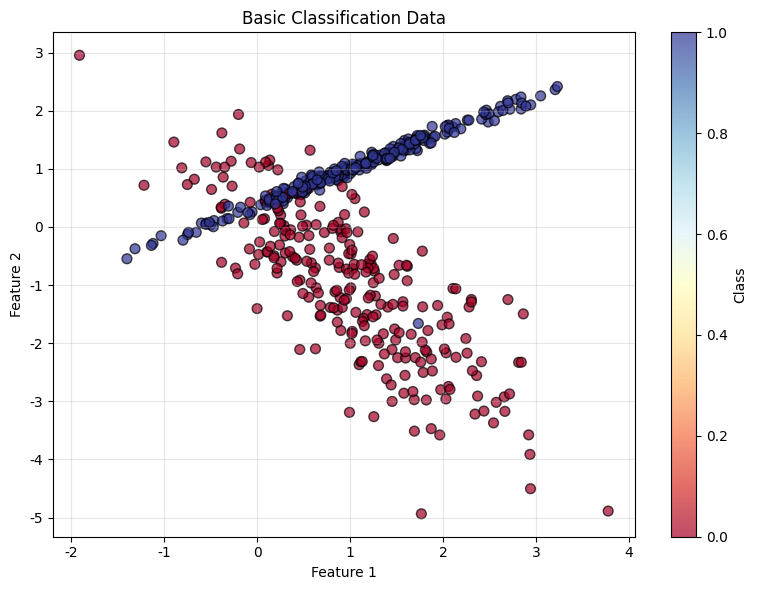

In [5]:
# make_classificationによる基本的な分類データ生成
X_basic, y_basic = make_classification(
    n_samples=500,          # サンプル数
    n_features=2,           # 特徴量数（2次元で可視化可能）
    n_informative=2,        # 有用な特徴量数
    n_redundant=0,          # 冗長な特徴量数
    n_clusters_per_class=1, # クラスごとのクラスタ数
    random_state=42
)

# データの基本情報
print(f"データ形状: {X_basic.shape}")
print(f"クラス数: {len(np.unique(y_basic))}")
print(f"クラス分布: {np.bincount(y_basic)}")

# 可視化
plt.figure(figsize=(8, 6))
plt.scatter(X_basic[:, 0], X_basic[:, 1], c=y_basic, cmap='RdYlBu', 
            edgecolors='black', s=50, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Basic Classification Data')
plt.colorbar(label='Class')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### make_classificationのパラメータ解説

#### 重要なパラメータ

**n_samples（サンプル数）**
- 生成するデータポイントの数
- 推奨：特徴量数の10倍以上
- 多すぎると計算時間が増加

**n_features（特徴量数）**
- データの次元数
- 多すぎると「次元の呪い」が発生
- 実務では10〜1000程度が多い

**n_informative（有用な特徴量数）**
- 実際にクラス分けに役立つ特徴量の数
- 少なすぎると学習が難しい
- n_features以下である必要がある

**n_redundant（冗長な特徴量数）**
- 他の特徴量の線形結合で表せる特徴量
- 現実のデータには冗長性がよくある
- モデルの頑健性をテストできる

**n_clusters_per_class（クラスごとのクラスタ数）**
- 各クラスがいくつのクラスタに分かれているか
- 1なら単純、2以上なら複雑なパターン

**class_sep（クラス間の分離度）**
- 大きいほどクラスが明確に分離
- 小さいほど分類が難しい

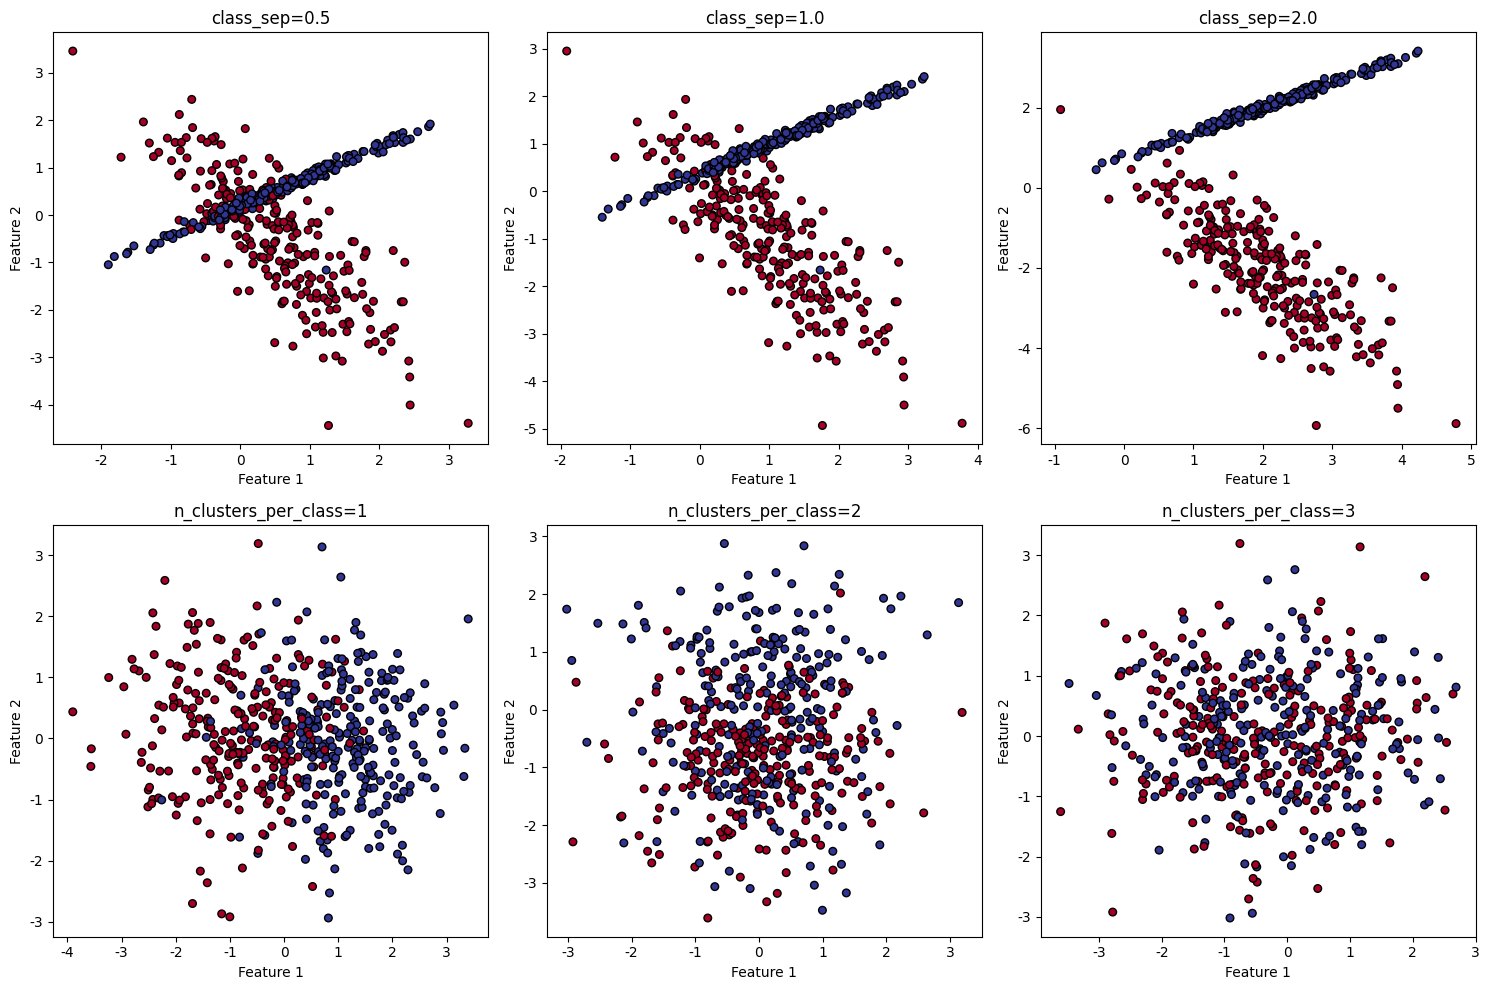

In [6]:
# パラメータの効果を比較
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# クラス分離度の比較
for idx, sep in enumerate([0.5, 1.0, 2.0]):
    X, y = make_classification(
        n_samples=500, n_features=2, n_informative=2,
        n_redundant=0, n_clusters_per_class=1,
        class_sep=sep, random_state=42
    )
    axes[0, idx].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu',
                         edgecolors='black', s=30)
    axes[0, idx].set_title(f'class_sep={sep}')
    axes[0, idx].set_xlabel('Feature 1')
    axes[0, idx].set_ylabel('Feature 2')

# クラスタ数の比較
for idx, n_clusters in enumerate([1, 2, 3]):
    X, y = make_classification(
        n_samples=500, n_features=4, n_informative=3,
        n_redundant=0, n_clusters_per_class=n_clusters,
        class_sep=1.0, random_state=42
    )
    # 最初の2次元のみプロット
    axes[1, idx].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu',
                         edgecolors='black', s=30)
    axes[1, idx].set_title(f'n_clusters_per_class={n_clusters}')
    axes[1, idx].set_xlabel('Feature 1')
    axes[1, idx].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

n_clusters_per_classパラメータには重要な落とし穴があります：

  問題点：
  1. 4次元→2次元への投影: コードでは4次元データを生成していますが、最初の2次元だけをプロットしています。高次元のクラスタ構造が2次元では見えていません。
  2. クラスタ構造が潰れている: 複数のクラスタが同じ2次元平面に投影されると、単に散らばって見えるだけになります。
  

## 3. 複雑なパターンの生成

### 非線形分離可能なデータ

現実世界の多くの問題は、単純な直線では分離できません。scikit-learnは、
様々な複雑なパターンのデータを生成する関数を提供しています。

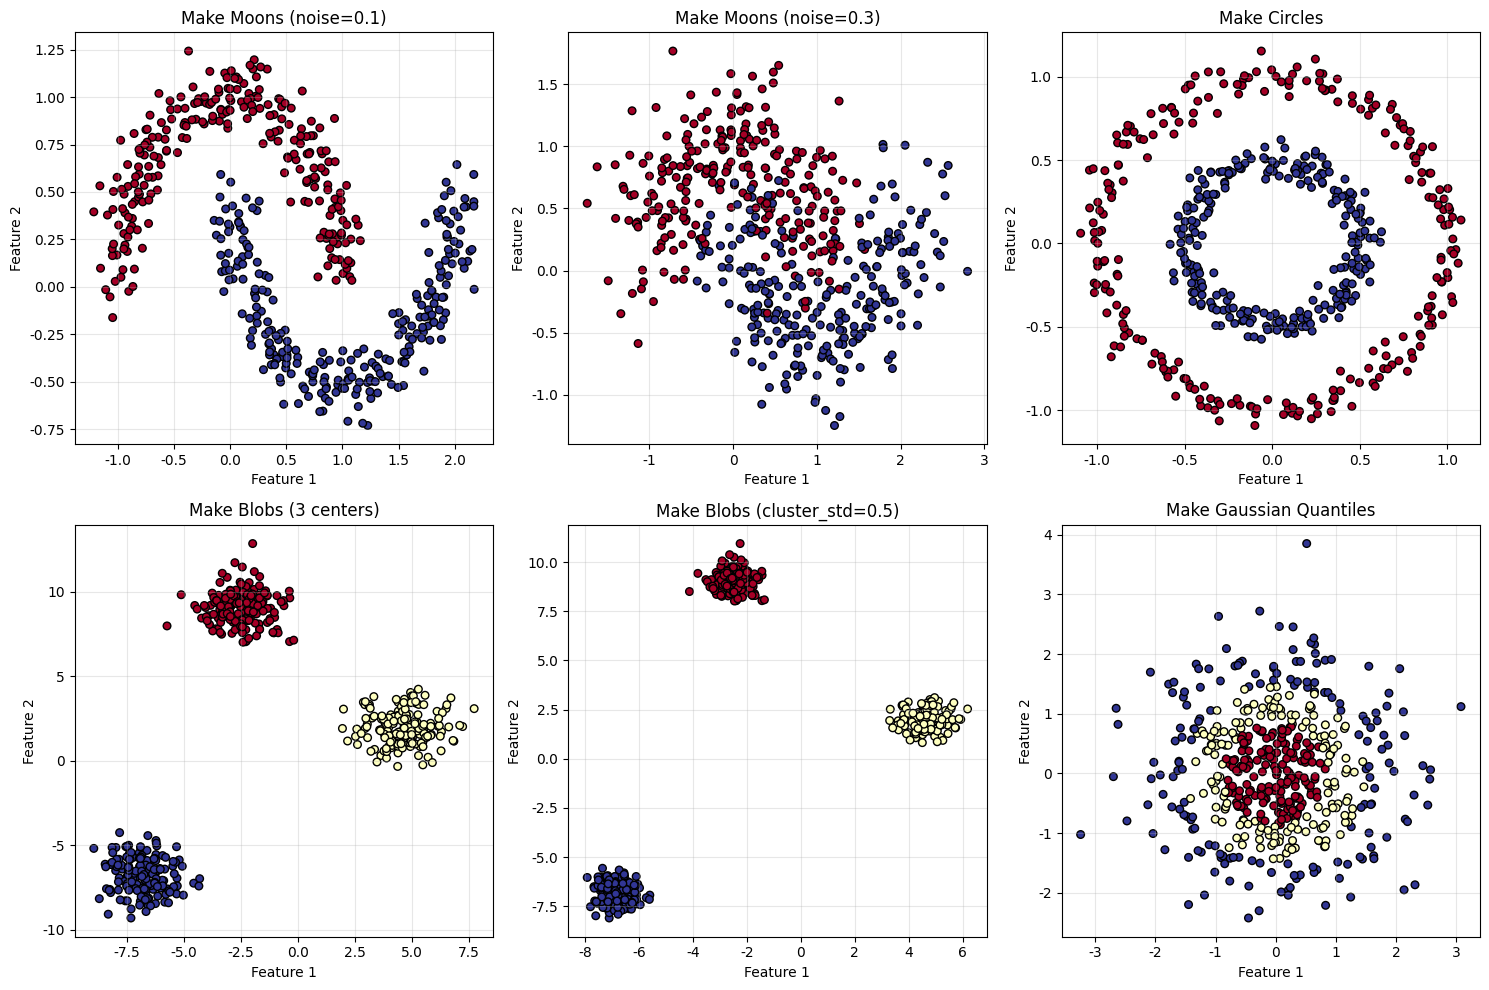

In [7]:
# 様々なパターンのデータ生成
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Make Moons（月形状）
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
axes[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                   edgecolors='black', s=30)
axes[0, 0].set_title('Make Moons (noise=0.1)')

# Make Moons（ノイズ大）
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
axes[0, 1].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                   edgecolors='black', s=30)
axes[0, 1].set_title('Make Moons (noise=0.3)')

# Make Circles（円形）
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
axes[0, 2].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                   edgecolors='black', s=30)
axes[0, 2].set_title('Make Circles')

# Make Blobs（クラスタ）
X, y = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
axes[1, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                   edgecolors='black', s=30)
axes[1, 0].set_title('Make Blobs (3 centers)')

# Make Blobs（標準偏差変更）
X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.5, random_state=42)
axes[1, 1].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                   edgecolors='black', s=30)
axes[1, 1].set_title('Make Blobs (cluster_std=0.5)')

# Make Gaussian Quantiles
X, y = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=3, random_state=42)
axes[1, 2].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                   edgecolors='black', s=30)
axes[1, 2].set_title('Make Gaussian Quantiles')

for ax in axes.ravel():
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 各データセットの特徴

**make_moons**
- 二つの半月形のクラス
- 線形分離不可能
- ニューラルネットワークやSVMのテストに最適

**make_circles**
- 同心円状のクラス
- より複雑な非線形パターン
- RBFカーネルSVMのデモに使用

**make_blobs**
- ガウス分布のクラスタ
- 線形分離可能（適切なパラメータで）
- クラスタリングアルゴリズムのテストに使用

**make_gaussian_quantiles**
- ガウス分布を分位数で分割
- 複雑な境界を持つ

## 4. 回帰用データの生成

### 回帰問題とは

回帰問題は、連続的な数値を予測する問題です。

#### 分類と回帰の違い

| 分類 | 回帰 |
|------|------|
| カテゴリーを予測 | 数値を予測 |
| 例：犬 or 猫 | 例：価格、気温 |
| 離散的 | 連続的 |
| 評価：正解率 | 評価：誤差 |

#### 実世界の回帰問題

- **住宅価格予測**: 特徴（広さ、築年数）→ 価格
- **売上予測**: 広告費、季節 → 売上額
- **気温予測**: 湿度、風速 → 気温

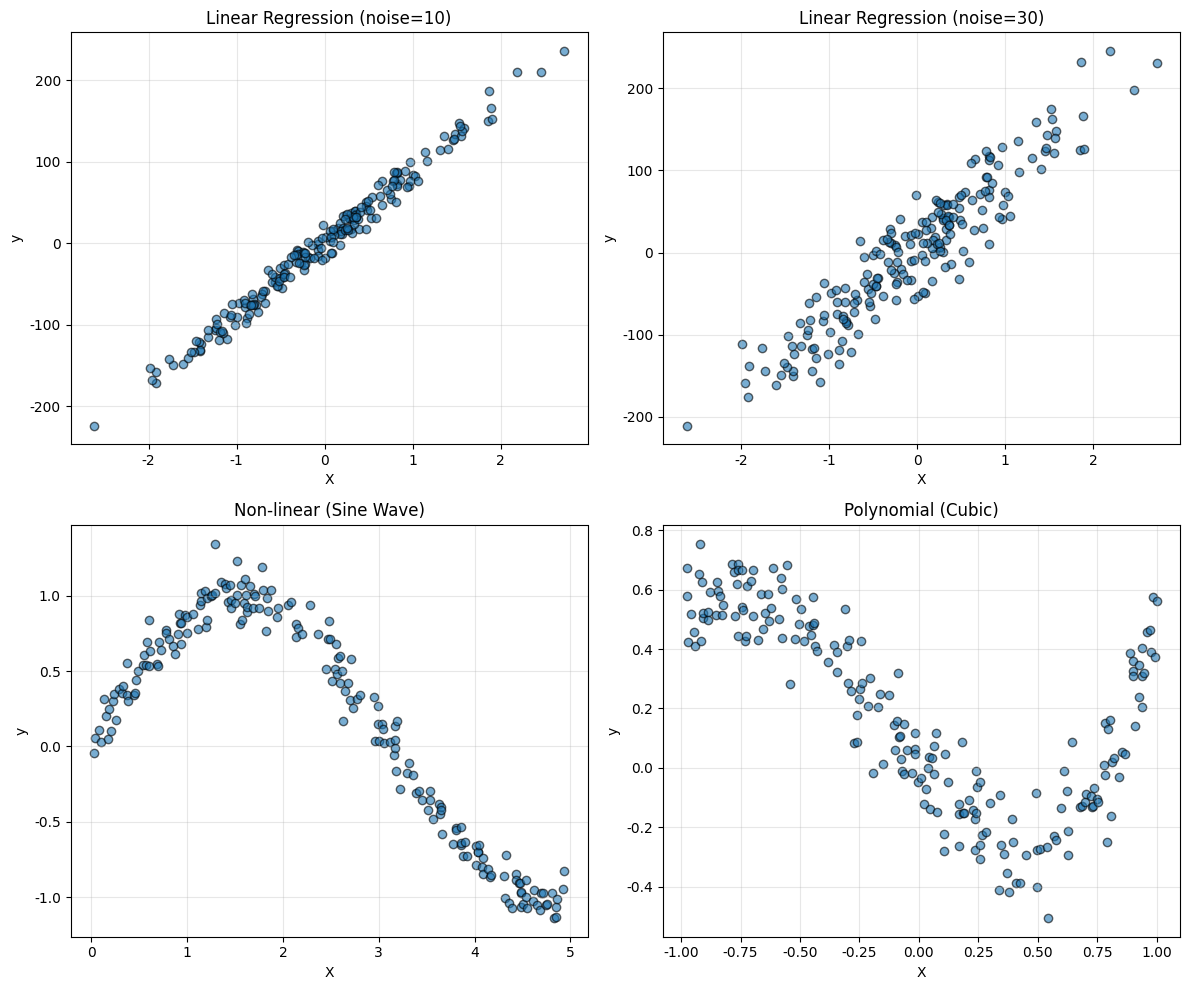

In [8]:
# 様々なノイズレベルの回帰データ
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ノイズ小
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
axes[0, 0].scatter(X, y, alpha=0.6, edgecolors='black')
axes[0, 0].set_title('Linear Regression (noise=10)')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('y')
axes[0, 0].grid(True, alpha=0.3)

# ノイズ大
X, y = make_regression(n_samples=200, n_features=1, noise=30, random_state=42)
axes[0, 1].scatter(X, y, alpha=0.6, edgecolors='black')
axes[0, 1].set_title('Linear Regression (noise=30)')
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('y')
axes[0, 1].grid(True, alpha=0.3)

# 非線形（正弦波）
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(200) * 0.1
axes[1, 0].scatter(X, y, alpha=0.6, edgecolors='black')
axes[1, 0].set_title('Non-linear (Sine Wave)')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('y')
axes[1, 0].grid(True, alpha=0.3)

# 非線形（多項式）
X = np.sort(2 * np.random.rand(200, 1) - 1, axis=0)
y = (X ** 3 + 0.5 * X ** 2 - X).ravel() + np.random.randn(200) * 0.1
axes[1, 1].scatter(X, y, alpha=0.6, edgecolors='black')
axes[1, 1].set_title('Polynomial (Cubic)')
axes[1, 1].set_xlabel('X')
axes[1, 1].set_ylabel('y')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### ノイズの影響

ノイズは現実のデータに常に存在します：

**ノイズの原因**
- 測定誤差
- 記録ミス
- 予測不可能な要因
- モデルに含まれていない変数の影響

**ノイズが大きいと**
- 予測精度が低下
- より複雑なモデルが必要
- 過学習のリスクが増加

## 5. 多クラス・高次元データ

### 実世界の複雑なデータ

実際の問題では、しばしば：
- 3クラス以上の分類が必要
- 数十〜数千の特徴量がある
- 特徴量間に相関がある

In [9]:
# 高次元多クラスデータの生成
X_high, y_high = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=4,
    n_clusters_per_class=2,
    random_state=42
)

print(f"データ形状: {X_high.shape}")
print(f"クラス数: {len(np.unique(y_high))}")
print(f"クラス分布: {np.bincount(y_high)}")
print(f"\n特徴量の統計:")
print(f"  平均: {X_high.mean(axis=0)[:5]}")
print(f"  標準偏差: {X_high.std(axis=0)[:5]}")

データ形状: (1000, 20)
クラス数: 4
クラス分布: [250 251 251 248]

特徴量の統計:
  平均: [-0.53561    -0.43112464  0.03730161  1.12028681  0.03927383]
  標準偏差: [2.04026586 3.55196129 1.01655692 4.19811251 2.0822951 ]


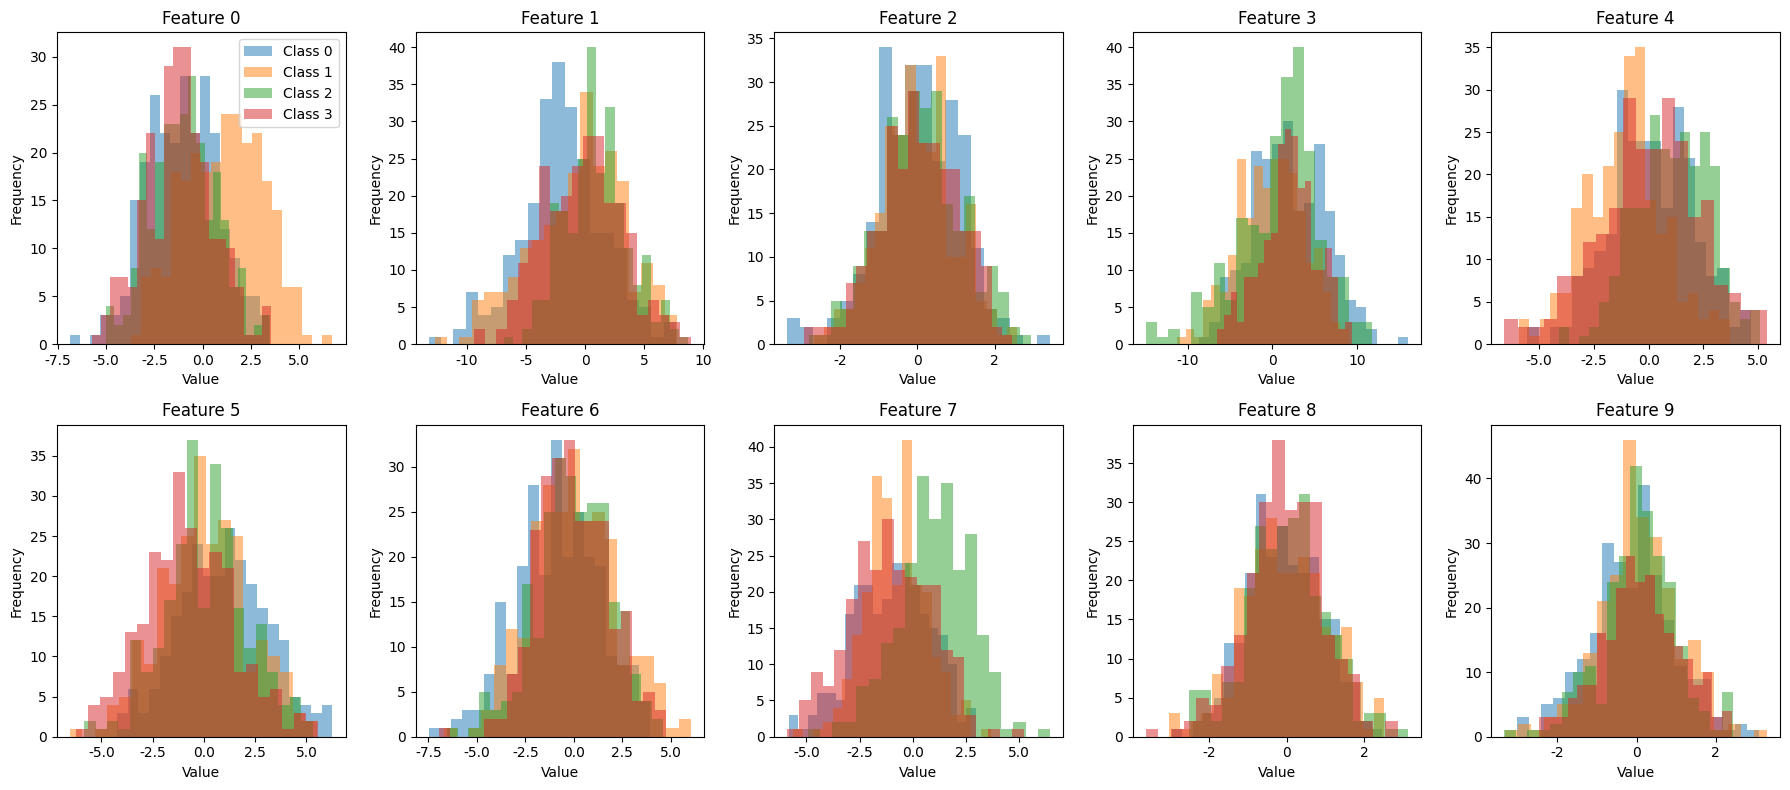

In [10]:
# 特徴量の分布を可視化
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.ravel()

for i in range(10):
    for cls in range(4):
        axes[i].hist(X_high[y_high == cls, i], bins=20, alpha=0.5, 
                     label=f'Class {cls}')
    axes[i].set_title(f'Feature {i}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    if i == 0:
        axes[i].legend()

plt.tight_layout()
plt.show()

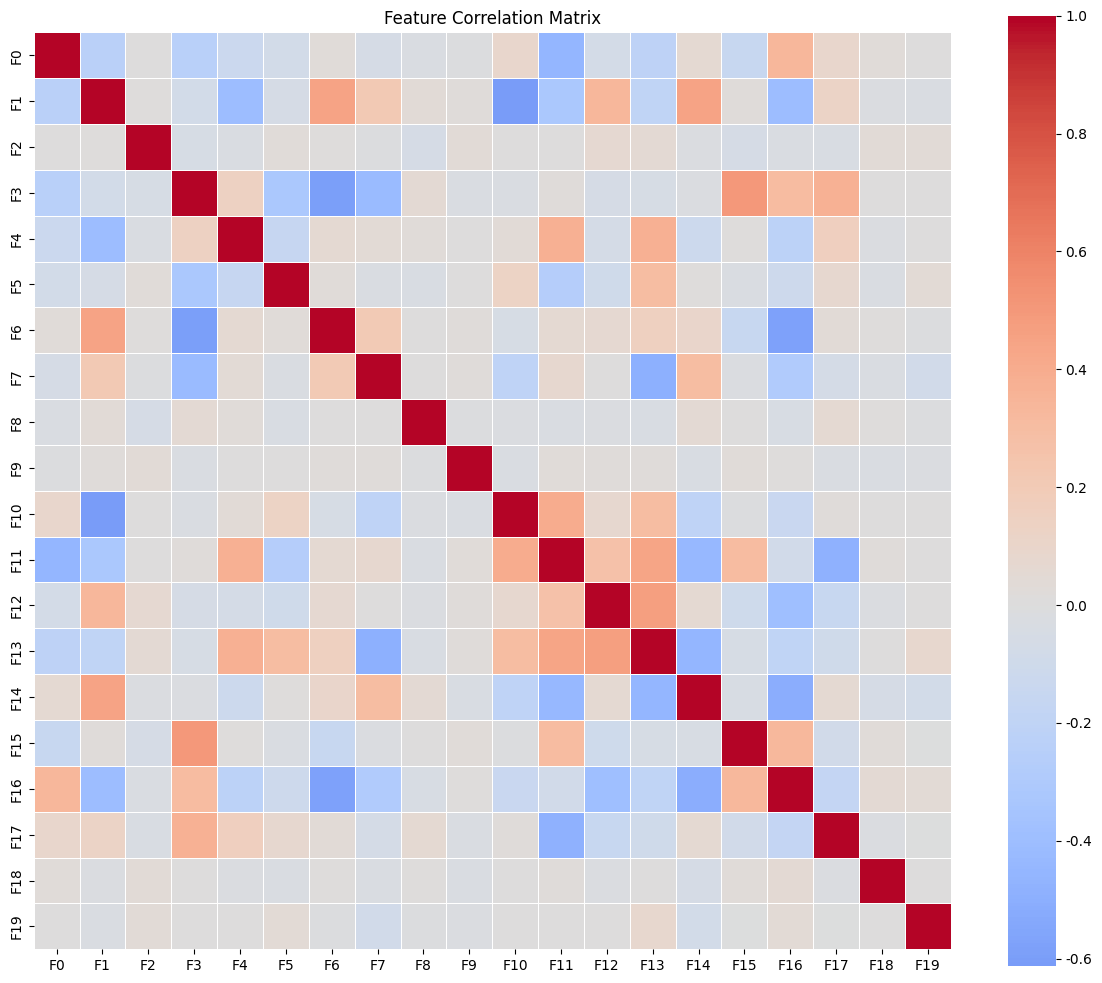


強い相関を持つ特徴量ペア（|r| > 0.7）:


In [11]:
# 特徴量間の相関行列
df = pd.DataFrame(X_high, columns=[f'F{i}' for i in range(X_high.shape[1])])
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# 強い相関を持つペアを表示
print("\n強い相関を持つ特徴量ペア（|r| > 0.7）:")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(f"  {corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

## 6. カスタムデータセットの作成

### 特定のパターンを持つデータ

scikit-learnの関数では生成できない特殊なパターンが必要な場合、
自分でデータ生成関数を作成できます。

In [12]:
def create_spiral_data(n_samples=500, noise=0.2):
    """
    スパイラル（渦巻き）形状の分類データを生成
    
    Parameters:
    -----------
    n_samples : int
        サンプル数
    noise : float
        ノイズの大きさ
    
    Returns:
    --------
    X : array, shape (n_samples, 2)
        特徴量
    y : array, shape (n_samples,)
        クラスラベル
    """
    n = n_samples // 2
    
    # 第1のスパイラル
    theta1 = np.sqrt(np.random.rand(n)) * 2 * np.pi
    r1 = 2 * theta1 + np.pi
    x1 = r1 * np.cos(theta1) + np.random.randn(n) * noise
    y1 = r1 * np.sin(theta1) + np.random.randn(n) * noise
    
    # 第2のスパイラル
    theta2 = np.sqrt(np.random.rand(n)) * 2 * np.pi
    r2 = -2 * theta2 - np.pi
    x2 = r2 * np.cos(theta2) + np.random.randn(n) * noise
    y2 = r2 * np.sin(theta2) + np.random.randn(n) * noise
    
    X = np.vstack([np.column_stack([x1, y1]), np.column_stack([x2, y2])])
    y = np.hstack([np.zeros(n), np.ones(n)])
    
    return X, y.astype(int)

def create_xor_data(n_samples=500, noise=0.1):
    """
    XORパターンのデータを生成
    """
    n = n_samples // 4
    
    # 4つの象限
    X1 = np.random.randn(n, 2) * noise + [1, 1]
    X2 = np.random.randn(n, 2) * noise + [-1, -1]
    X3 = np.random.randn(n, 2) * noise + [1, -1]
    X4 = np.random.randn(n, 2) * noise + [-1, 1]
    
    X = np.vstack([X1, X2, X3, X4])
    y = np.hstack([np.zeros(n), np.zeros(n), np.ones(n), np.ones(n)])
    
    return X, y.astype(int)

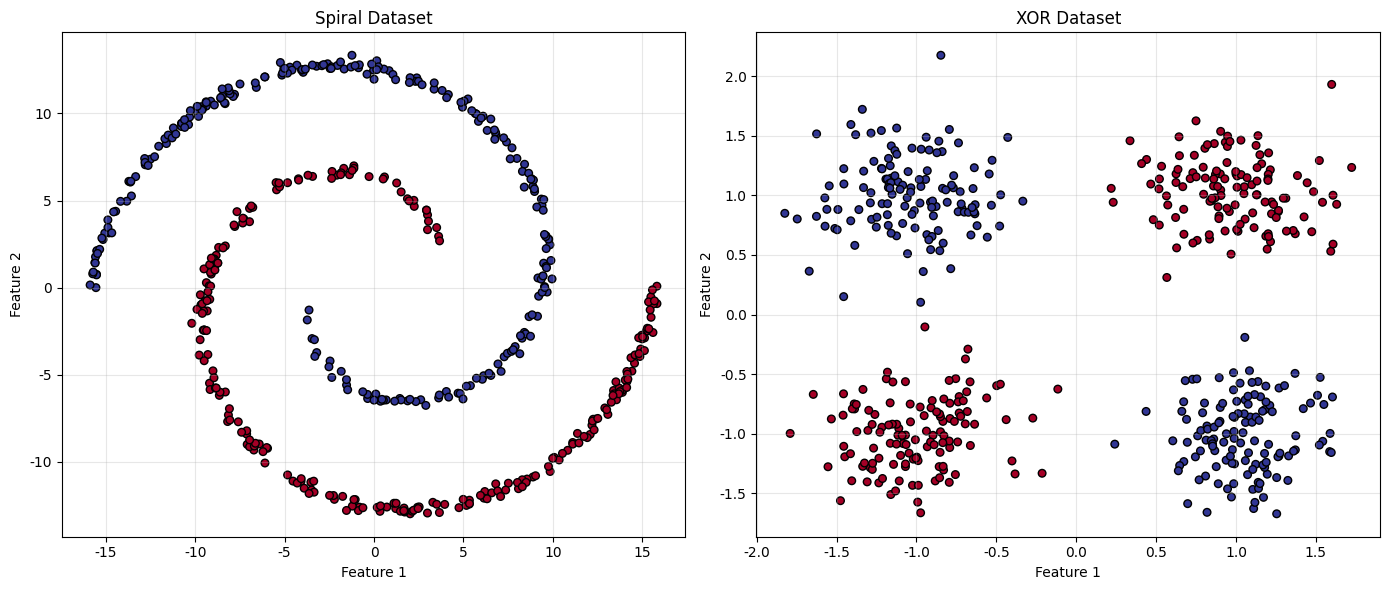

これらのパターンは線形分離不可能です。
ニューラルネットワークや非線形SVMが必要です。


In [13]:
# カスタムデータセットの可視化
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# スパイラルデータ
X_spiral, y_spiral = create_spiral_data(n_samples=500, noise=0.2)
axes[0].scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, cmap='RdYlBu', 
                edgecolors='black', s=30)
axes[0].set_title('Spiral Dataset')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

# XORデータ
X_xor, y_xor = create_xor_data(n_samples=500, noise=0.3)
axes[1].scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='RdYlBu', 
                edgecolors='black', s=30)
axes[1].set_title('XOR Dataset')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("これらのパターンは線形分離不可能です。")
print("ニューラルネットワークや非線形SVMが必要です。")

## 7. ベストプラクティス

### データ生成時の推奨事項

1. **random_stateを設定する**
   - 再現性のために必須
   - デバッグが容易になる

2. **適切なサンプル数を選ぶ**
   - 少なすぎ：学習が不安定
   - 多すぎ：計算時間の無駄
   - 推奨：特徴量数の10〜100倍

3. **データを必ず可視化する**
   - パターンの確認
   - 異常値の検出
   - 問題の理解

4. **適切なノイズレベルを設定**
   - 現実的な難易度に設定
   - ノイズなしは非現実的
   - ノイズ大きすぎは学習不可能

5. **問題の難易度を調整**
   - 学習段階：簡単なデータから始める
   - テスト段階：難しいデータで検証
   - 本番前：様々な難易度で評価

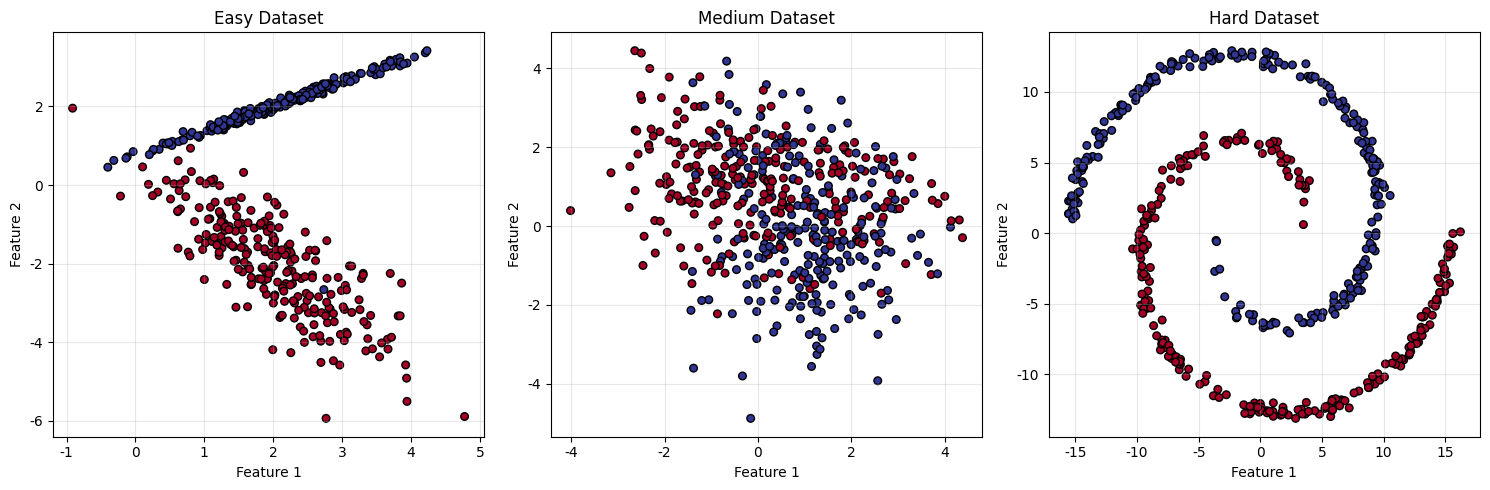

In [14]:
# ベストプラクティスの実践例
def generate_dataset_for_learning(difficulty='easy'):
    """
    学習目的に応じた適切なデータセットを生成
    
    Parameters:
    -----------
    difficulty : str
        'easy', 'medium', 'hard'
    """
    if difficulty == 'easy':
        X, y = make_classification(
            n_samples=500,
            n_features=2,
            n_informative=2,
            n_redundant=0,
            n_clusters_per_class=1,
            class_sep=2.0,
            random_state=42
        )
    elif difficulty == 'medium':
        X, y = make_classification(
            n_samples=500,
            n_features=10,
            n_informative=5,
            n_redundant=3,
            n_clusters_per_class=2,
            class_sep=1.0,
            random_state=42
        )
    else:  # hard
        X, y = create_spiral_data(n_samples=500, noise=0.3)
    
    return X, y

# 3つの難易度のデータを可視化
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
difficulties = ['easy', 'medium', 'hard']

for idx, diff in enumerate(difficulties):
    X, y = generate_dataset_for_learning(diff)
    if X.shape[1] == 2:
        axes[idx].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                         edgecolors='black', s=30)
    else:
        # 高次元の場合、最初の2次元のみ表示
        axes[idx].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                         edgecolors='black', s=30)
    axes[idx].set_title(f'{diff.capitalize()} Dataset')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. まとめ

### 本ノートブックで学んだこと

1. **データシミュレーションの重要性**
   - 学習、検証、プロトタイプ開発での活用
   - 実データ収集前の実験

2. **分類データの生成**
   - make_classificationの使い方
   - パラメータの影響
   - 複雑なパターン（moons, circles, blobs）

3. **回帰データの生成**
   - make_regressionの使い方
   - ノイズの影響
   - 線形と非線形の関係

4. **高次元・多クラスデータ**
   - 複雑なデータの生成
   - 特徴量間の相関
   - 可視化の工夫

5. **カスタムデータセット**
   - 独自のパターンの作成
   - スパイラル、XORなどの非線形パターン

6. **ベストプラクティス**
   - 再現性の確保
   - 適切なサンプル数とノイズレベル
   - 可視化の重要性

### 次のステップ

- Notebook 02で、生成したデータの前処理を学ぶ
- Notebook 03で、モデルの評価方法を学ぶ
- 実際の機械学習モデルで生成したデータを使って実験